# Presentation 
    
    Goal

Detective Sharelock Codes has to inspect a lot of crime scenes. He finds clues scattered around the crime scene, and the location of these clues is diligently recorded by Dr. Watchdog.

The good doctor sends the coordinates of all clue locations (Xi Yi) to the detective by email. Sharelock then calculates how many rolls of yellow police line L he must purchase in order to protect all of the clues.

Obviously, all clues must be enclosed in a single "ribboned" area, but in addition, all clues must be at least 3 feet from the police line at all points.

A roll of ribbon is 5 feet long and is quite expensive, so Sharelock wants to buy only as many rolls as needed. Help him by writing a program to calculate the the minimal number of rolls required to surround the crime scene.

# Code

For this puzzle, let's first create the scene crime using random

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
nb_clues = 150
width, height = 1000, 1000
x = np.random.normal(loc=width/2, scale=width/10, size=nb_clues)
y = np.random.normal(loc=height/2, scale=height/10, size=nb_clues)

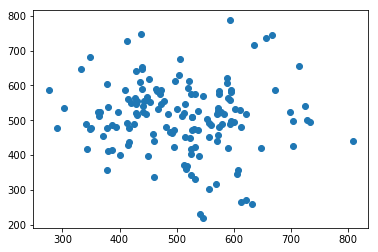

In [3]:
plt.scatter(x, y)
plt.ylim=((0, height))
plt.xlim=((0, width))
# plt.axis('off')
plt.show()

Now we have our crime scene, what we want is to surround the whole scene with one ribbon. On such cases, we expect to calculate the Convexe Hull. 
One known algorithms to do that is <a href="https://en.wikibooks.org/wiki/Algorithm_Implementation/Geometry/Convex_hull/Monotone_chain" target="_blank"> Andrew's algorithm</a>. It's an algorithm in complexity O(n) when the dataset is sorted.
In the future, we will see the current fastest one which is <a href="https://en.wikipedia.org/wiki/Chan%27s_algorithm" target="_blank">Chan's algorithm</a>. The complexity is O(nlog(h)) with h the number of points in the convex hull. Depending on the situation, both a really efficient. For now, let start with :

# Andrew's algorithm

This algorithm split the research in 2 parts, the top and bottom hulls. Both will be merged at the end.
To determine all points include in the hull, we start with the point the most at the left (that's why we sort them by x-corrdinate). 

Every turn we add the next following point into the hull. Then we check backward if the angle between the last point (B), the previous last point (A) and 2 points before (O) make a CCW rotation. If yes, that means the latest point is "more outside". In that case, we replace the "current last point" (A) by the next one (B).
In the picture below, the point C is checked before A but we can see that the angle would be CW.

For the bottom part of the Hull, we go either in reversed x-direction and looking for CCW rotation, or we go in the same x-direction but look for CW rotation.
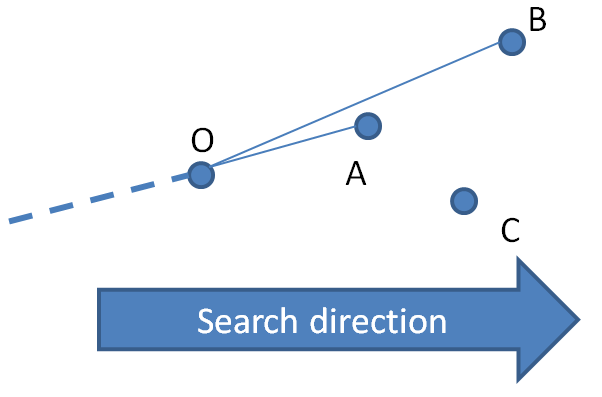 

In [4]:
def andrew(S):
    S.sort() # required in that case as our input is not sorted
    top_side = []
    bottom_side = []
    for p in S:
        # We do in parallel the top and bottom hulls
        while len(top_side) >=2 and not left_turn(p, top_side[-1], top_side[-2]):
            top_side.pop()
        top_side.append(p)
        while len(bottom_side) >=2 and not left_turn(bottom_side[-2], bottom_side[-1], p): # <= reversed to check to right
            bottom_side.pop()
        bottom_side.append(p)
    return bottom_side[:-1] + top_side[:0:-1]
        

def left_turn(O, A, B): 
    """This function return true if the angle AOB is CW """
    return (O[0]-B[0])*(A[1]-B[1]) - (O[1]-B[1])*(A[0]-B[0]) > 0

points = list(zip(x, y))
hull = andrew(points)
print(hull)

[(275.79086582540231, 586.85673641216829), (290.89545926402332, 477.98522979614472), (378.43258215236892, 356.5563935007379), (545.84522808700228, 219.06729904975538), (631.01635323413393, 257.67039473507236), (808.37509754299231, 438.85952343575951), (714.73312849043771, 657.38678390843484), (667.12453230196923, 744.10764517525399), (593.70316821510016, 787.57167863193672), (438.1090795415472, 748.71233905676968), (348.2621118571443, 682.35631335906032)]


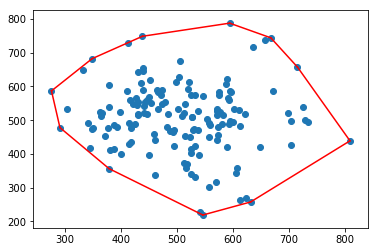

In [5]:
h = len(hull)
for i in range(h):
    elem1 = hull[i]
    elem2 = hull[(i+1)%h]
    x1, y1 = zip(*[elem1, elem2])
    plt.plot(x1,y1, color="red")

plt.scatter(x, y)
plt.ylim=((0, height))
plt.xlim=((0, width))
plt.show()

# Solution

Now we have our convexe hull for this problem we can solve it. We know all points of the hull so we can calculate the distance of the hull. After we need to offset all border to 3 feets outside by safety. By luck our Hull in Convex so the additionnal distance required for this offset will be easy to calculate and then we can determine how many ribbon we need.
$$
\begin{array}{c}
L = L + (2* \Pi * Offset) \cr
\end{array}
$$

In [6]:
hull = hull
dist = 0
for i in range(h):
    a = hull[i]
    b = hull[(i+1)%h]
    dist += math.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
print(dist)

1637.2463611573378


In [7]:
offset = 2 * math.pi * 3
dist += offset
print(dist)

1656.0959170788765


In [8]:
print("We need {} ribbons !".format(math.ceil(dist/5)))

We need 332 ribbons !


# Bonus

In this section, I'll generate on a smaller qty of points, the complete path tried by algorithm

In [11]:
nb_clues = 15
width, height = 1000, 1000
x = np.random.normal(loc=width/2, scale=width/10, size=nb_clues)
y = np.random.normal(loc=height/2, scale=height/10, size=nb_clues)

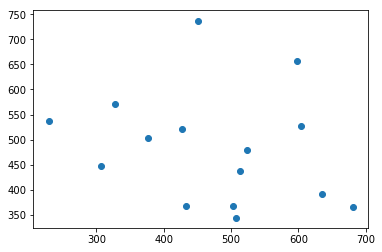

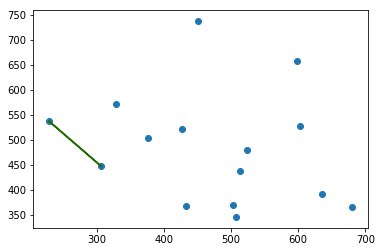

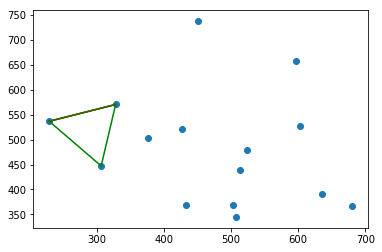

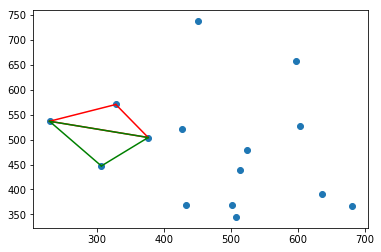

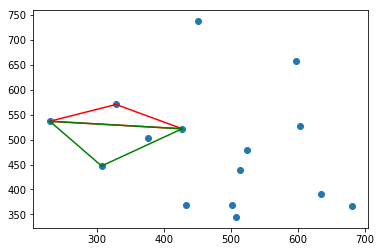

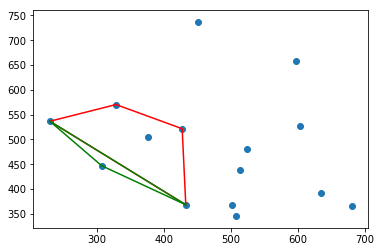

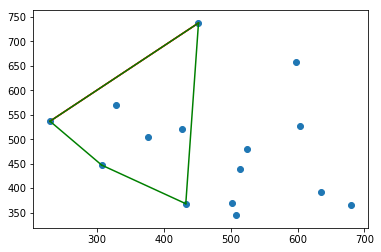

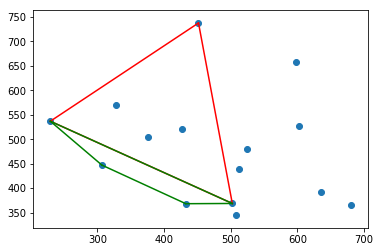

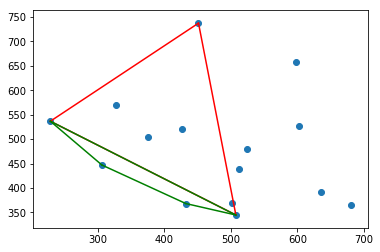

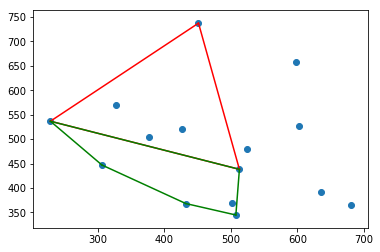

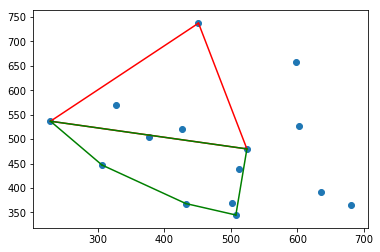

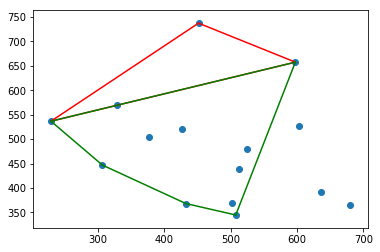

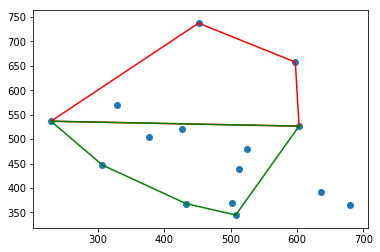

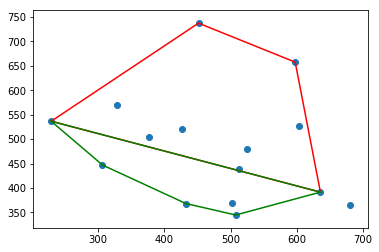

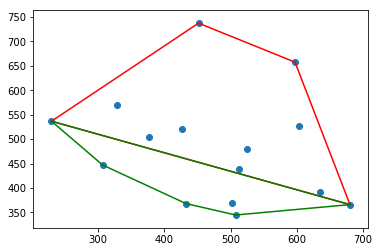

[(229.22936927936337, 536.64026013361081), (306.61821816082613, 447.07479689487815), (432.54799120822349, 368.27539846799874), (507.66573219075269, 344.84851904132671), (680.59885042335361, 366.10036253796022), (597.50410932053592, 657.4539758814301), (451.56995849758192, 737.19659984257305)]


In [12]:
def display_status(top, bot):
    h1 = len(top)
    h2 = len(bot)
    for i in range(h1):
        elem1 = top[i]
        elem2 = top[(i+1)%h1]
        x1, y1 = zip(*[elem1, elem2])
        plt.plot(x1, y1, color="red")
    for j in range(h2):
        elem1 = bot[j]
        elem2 = bot[(j+1)%h2]
        x1, y1 = zip(*[elem1, elem2])
        plt.plot(x1, y1, color="green")
    plt.scatter(x, y)
    plt.ylim=((0, height))
    plt.xlim=((0, width))
    plt.show()

def andrew(S):
    S.sort() # required in that case as our input is not sorted
    top_side = []
    bottom_side = []
    for p in S:
        while len(top_side) >=2 and not left_turn(p, top_side[-1], top_side[-2]):
            top_side.pop()
        top_side.append(p)
        while len(bottom_side) >=2 and not left_turn(bottom_side[-2], bottom_side[-1], p): # <= reversed to check to right
            bottom_side.pop()
        bottom_side.append(p)
        display_status(top_side, bottom_side)
    return bottom_side[:-1] + top_side[:0:-1]
        

def left_turn(O, A, B): 
    """This function return true if the angle AOB is CW """
    return (O[0]-B[0])*(A[1]-B[1]) - (O[1]-B[1])*(A[0]-B[0]) > 0

points = list(zip(x, y))
hull = andrew(points)
print(hull)